# Deep Learning Solution

In [1]:
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from numpy import zeros
from keras.layers import Flatten
from keras.layers.core import Activation, Dropout, Dense
import matplotlib.pyplot as plt

In [2]:
unbalanced_data = pd.read_csv("clean_data.csv")[['clean text','dialect']]
data = unbalanced_data.groupby('dialect')
data = pd.DataFrame(data.apply(lambda x: x.sample(data.size().min()).reset_index(drop=True)))

In [3]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True) 

In [4]:
data['clean text'].isna().sum()

0

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data['clean text'], data['dialect'], test_size =.2, random_state=100)

In [6]:
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [7]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [8]:
embeddings_dictionary = dict()
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [9]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          23931100  
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 128)               1280128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [11]:
history = model.fit(X_train, Y_train.astype('category').cat.codes, batch_size=500, epochs=10, validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 83s 291ms/step - loss: -0.1511 - acc: 0.0553 - val_loss: -0.9985 - val_acc: 0.0566
Epoch 2/10
213/213 [==============================] - 57s 270ms/step - loss: -1.8380 - acc: 0.0552 - val_loss: -2.6751 - val_acc: 0.0566
Epoch 3/10
213/213 [==============================] - 56s 263ms/step - loss: -3.5094 - acc: 0.0552 - val_loss: -4.3359 - val_acc: 0.0566
Epoch 4/10
213/213 [==============================] - 31s 145ms/step - loss: -5.1656 - acc: 0.0552 - val_loss: -5.9834 - val_acc: 0.0566
Epoch 5/10
213/213 [==============================] - 55s 258ms/step - loss: -6.8081 - acc: 0.0552 - val_loss: -7.6173 - val_acc: 0.0566
Epoch 6/10
213/213 [==============================] - 55s 258ms/step - loss: -8.4395 - acc: 0.0552 - val_loss: -9.2414 - val_acc: 0.0566
Epoch 7/10
213/213 [==============================] - 57s 267ms/step - loss: -10.0613 - acc: 0.0552 - val_loss: -10.8562 - val_acc: 0.0566
Epoch 8/10
213/213 [===================

In [12]:
score = model.evaluate(X_test, Y_test.astype('category').cat.codes, verbose=1)

1040/1040 [==============================] - 39s 8ms/step - loss: -15.7361 - acc: 0.0558


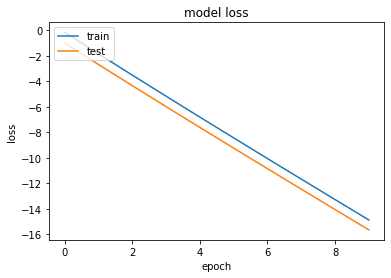

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

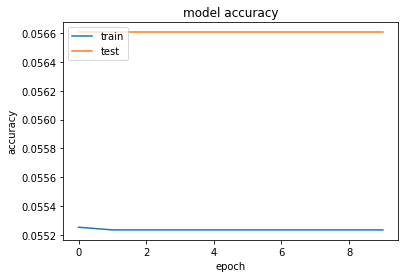

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()